# CNN Playground

### Download data

In [22]:
import zipfile

# Download file zip hình ảnh pizza_steak
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Giải nén file đã tải
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [23]:
# Lấy dữ liệu (10% nhãn)
# Download dữ liệu
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# # Giải nén dữ liệu đã download 
# zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [24]:
#!brew install tree
!tree pizza_steak/train -d
    

pizza_steak/train
├── pizza
└── steak

2 directories


In [25]:
!tree pizza_steak/test -d

pizza_steak/test
├── pizza
└── steak

2 directories


In [26]:
import os

def count_files(dir):
    print(f"{dir} has {len(os.listdir(dir))} files")

train_path = 'pizza_steak/train'
test_path = 'pizza_steak/test'

count_files(train_path+'/pizza')
count_files(train_path+'/steak')
count_files(test_path+'/pizza')
count_files(test_path+'/steak')

pizza_steak/train/pizza has 750 files
pizza_steak/train/steak has 750 files
pizza_steak/test/pizza has 250 files
pizza_steak/test/steak has 250 files


In [27]:
# Tạo classname từ list dir
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [28]:
data_dir.glob('*')

<generator object Path.glob at 0x7fe637033ad0>

In [29]:
for item in data_dir.glob('*'):
    print(item.name)

steak
pizza


In [30]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


### Visualization

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Get random image

In [32]:
def view_random_image(target_dir: str, target_class: str):
    target_folder = target_dir+'/'+target_class
    random_file_name = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_file_name[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img
    

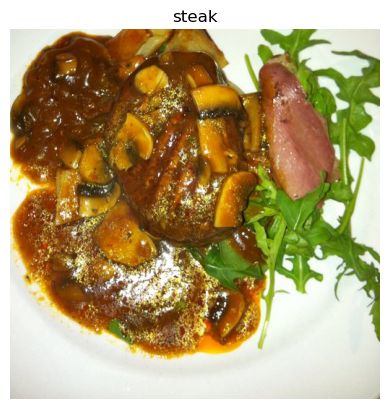

In [33]:
random_train_image = view_random_image(train_path, 'steak')

In [34]:
type(random_train_image)

numpy.ndarray

In [35]:
random_train_image.shape

(512, 512, 3)

### Baseline

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_data_gen.flow_from_directory(train_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)
test_data = train_data_gen.flow_from_directory(test_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [44]:
from pickletools import optimize


model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

2022-10-12 17:04:04.571185: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 17:04:04.571730: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train for 47 steps, validate for 16 steps
Epoch 1/5
29/47 [=================>............] - ETA: 38s - loss: 0.6197 - accuracy: 0.6446

KeyboardInterrupt: 